<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data preprocessing</center>

# Challenge S1: Introducción

# Objetivos

En este challenge nos enfrentaremos a un dataset con datos sobre inmuebles en California. Este dataset tiene la particularidad de poseer valores nulos/faltantes y outliers en algunas de sus variables. Por tanto, el objetivo es poner en práctica las técnicas que hemos visto en el worksheet para lidiar con estas situaciones.

# Configuración del entorno

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (0.22.1)


# Carga de datos
Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Valores nulos

En primer lugar, identifica aquellas columnas que tienen valores nulos/faltantes

In [5]:
print(df.isnull().sum())
total_cells = np.product(df.shape)
total_missing = df.isnull().sum()
# Procentaje de datos que faltan por columnas
print ("\nPorcentaje de datos faltantes por columna:\n",(total_missing/total_cells) * 100)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Porcentaje de datos faltantes por columna:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.100291
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


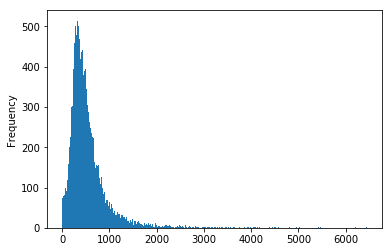

In [6]:
# grafica original con datos nulos (nan)
df.total_bedrooms.plot.hist(bins=500)

Elige una de estas columnas para probar diferentes estrategias de manejo de valores nulos.

Primero, crea una copia de esta columna utilizando la estrategia de rellenado con la mediana.

In [7]:
#### MEDIANA #####
print ("MEDIANA: ",df.total_bedrooms.median())
df_tmp = df.copy()
from sklearn.impute import SimpleImputer
temp_values = df_tmp.total_bedrooms.values.reshape(-1,1)
#temp_values
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(temp_values)
transformed_values = imp_median.transform(temp_values)
#transformed_values

MEDIANA:  435.0


In [8]:
df_tmp.total_bedrooms = transformed_values
#df_tmp.total_bedrooms

In [9]:
#comprobamos que no hay nulos
df_tmp.total_bedrooms.isnull().sum()

0

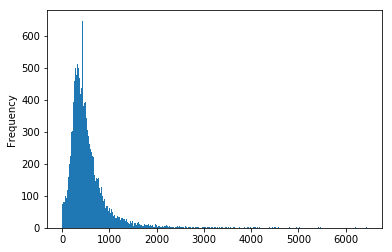

In [10]:
df_tmp.total_bedrooms.plot.hist(bins=500)

Segundo, crea una copia de esta columna utilizando la estrategia de rellenado con media aritmética.

In [11]:
#### MEDIA ####
print ("MEDIA: ",df.total_bedrooms.mean())
df_tmp2 = df.copy()
temp2_values = df_tmp2.total_bedrooms.values.reshape(-1,1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(temp2_values)
transformed_values2 = imp_mean.transform(temp2_values)
#transformed_values

MEDIA:  537.8705525375618


In [12]:
df_tmp2.total_bedrooms = transformed_values2

In [13]:
#comprobamos que no hay nulos
df_tmp2.total_bedrooms.isnull().sum()

0

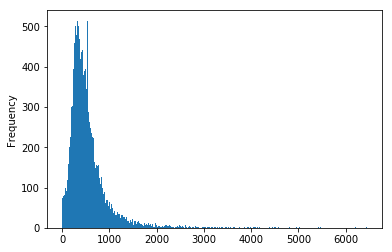

In [14]:
df_tmp2['total_bedrooms'].plot.hist(bins=500)
#df_tmp2['total_bedrooms'].plot.line()

Tercero, crea una copia de esta columna utilizando la estrategia de rellenado con valor fijo de 0.

In [15]:
#### NULOS ####
df_tmp3 = df.copy()
temp3_values = df_tmp3.total_bedrooms.values.reshape(-1,1)
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant',verbose=1)
imp_zeros.fit(temp3_values)
transformed_values3 = imp_mean.transform(temp3_values)
#transformed_values3

In [16]:
df_tmp3.total_bedrooms = transformed_values3
#comprobamos que no hay nulos
df_tmp3.total_bedrooms.isnull().sum()

0

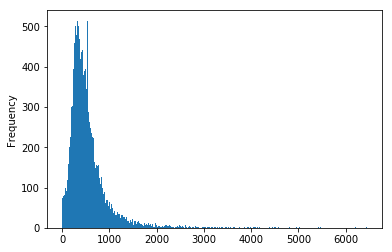

In [17]:
df_tmp3['total_bedrooms'].plot.hist(bins=500)
#df_tmp3['total_bedrooms'].plot.line()

Cuarto, crea una copia de esta columna utilizando una nueva estrategia de rellenado que tú quieras y **justifica el motivo**.

In [18]:
#### MAS FRECUENTE ####
# Antes de elegir una nueva estrategia , uso la de la moda para ver los resultados
df_tmp4 = df.copy()
temp4_values = df_tmp4.total_bedrooms.values.reshape(-1,1)
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_zeros.fit(temp4_values)
transformed_values4 = imp_mean.transform(temp4_values)

In [19]:
df_tmp4.total_bedrooms = transformed_values4
df_tmp4.total_bedrooms.isnull().sum()

0

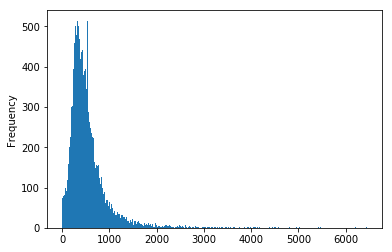

In [20]:
df_tmp4['total_bedrooms'].plot.hist(bins=500)

In [21]:
##### METODO DE INTERPOLACION ######
# Si tengo 3,4,NAN,5,6 ---> NAN = a la media del valor anterior y posterior
df_tmp5 = df.copy()
# Uso bfill() para que haga backwards filling, en caso de que el primer valor fuera NAN
# i.e 
#s = pd.Series([NA,7,6,NA,7])
#s.interpolate()
#0    NaN
#1    7.0
#2    6.0
#3    6.5
#s.interpolate().bfill()
#0    7.0
#1    7.0
#[...]
interpolate = df_tmp5.total_bedrooms.interpolate().bfill()
interpolate.isnull().sum()
df_tmp5['total_bedrooms'] = interpolate


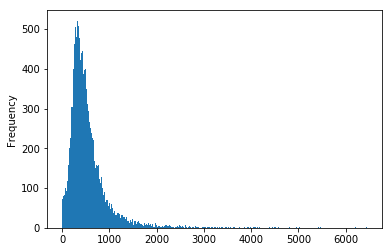

In [22]:
df_tmp5['total_bedrooms'].plot.hist(bins=500)

Analiza el efecto de estas cuatro estrategias de rellenado con respecto a la variable original con valores nulos:

* ¿Qué diferencias observas en la distribución de valores de las variables rellenadas?
    
    **Las graficas de la media, ceros y mas frecuente son identicas, mientras que la de la mediana varia ligeramente.
* ¿Cómo crees que pueden afectar los nuevos a algún análisis posterior?
    
    **Vamos a tener mas outliers usando la estrategia de la media,mediana,ceros y mas frecuente que usando interpolacion
* ¿Con qué estrategia te quedarías?
    
    **Con la estrategia de interpolacion que es la que mas se ajusta a la grafica original

# Outliers

Ahora, vamos a realizar un estudio de outliers sobre nuestro conjunto de datos. 

En primer lugar, ¿se te ocurre alguna forma sencilla de ver que variables pueden contener outliers?

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

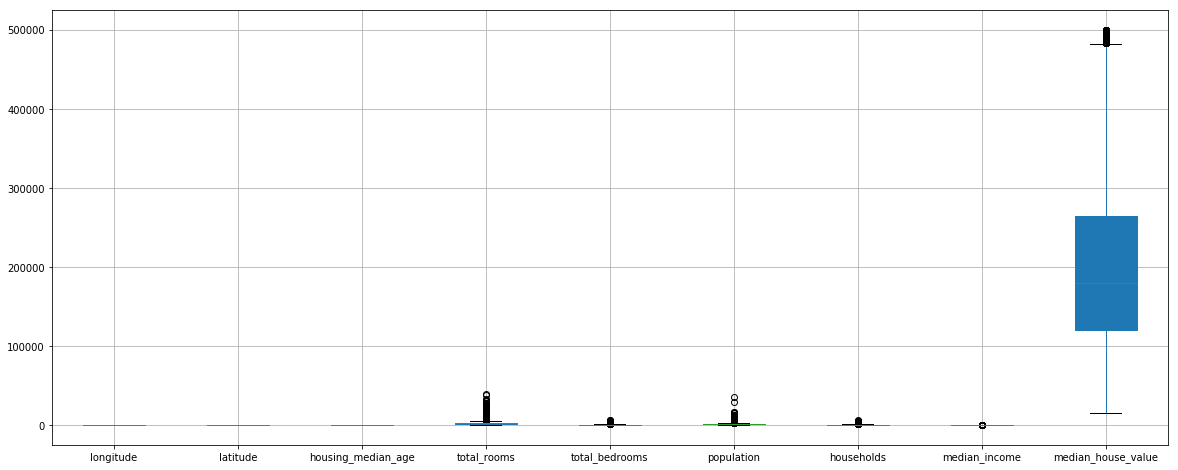

In [23]:
plt.subplots(figsize=[20,8])
df.boxplot(patch_artist=True)
plt.xticks(rotation=0)

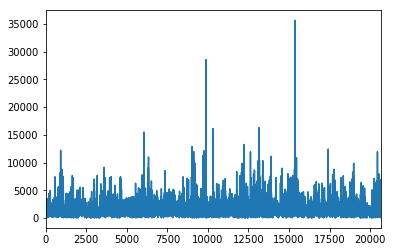

In [24]:
df.population.plot.line()

Selecciona una de estas variables y muestra un gráfico en el que sea evidente la presencia del outlier

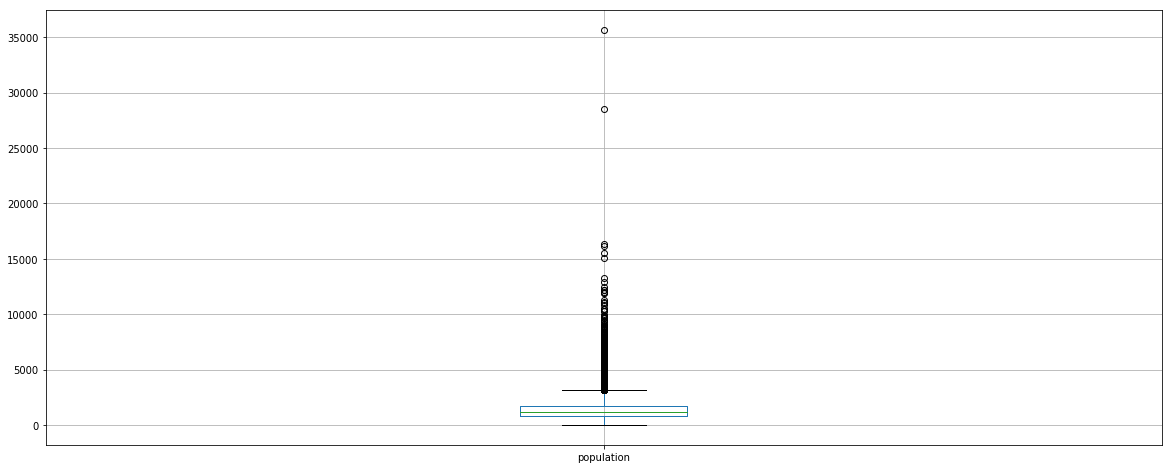

In [25]:
plt.subplots(figsize=[20,8])
df.boxplot('population')

Aplica el método de tukey visto en el Worksheet para filtrar el outlier.

In [26]:
def filtrar_outlier_tukey(x,valueq1=1.5,valueq3=1.5):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - valueq1*iqr
    ceiling = q3 + valueq3*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    print("Numero total de outliers: ",len(outlier_values))
    #print (outlier_values)
    return outlier_indices, outlier_values

Muestra el mismo gráfico de antes para tu variable sin esos outliers

In [27]:
outlier_indices, outlier_values = filtrar_outlier_tukey(df.population)

[q1=787.000000, q3=1725.000000, iqr=938.000000]
[floor=-620.000000, ceiling=3132.000000]
Numero total de outliers:  1196


In [28]:
# Eliminamos los outliers asignandoles Not a Number (nan)
df_no_outliers = df.copy()
for index in outlier_indices:
    df_no_outliers.population.at[index] = np.nan

In [29]:
_, _ = filtrar_outlier_tukey(df_no_outliers.drop(outlier_indices, axis=0).population)

[q1=767.000000, q3=1596.000000, iqr=829.000000]
[floor=-476.500000, ceiling=2839.500000]
Numero total de outliers:  374


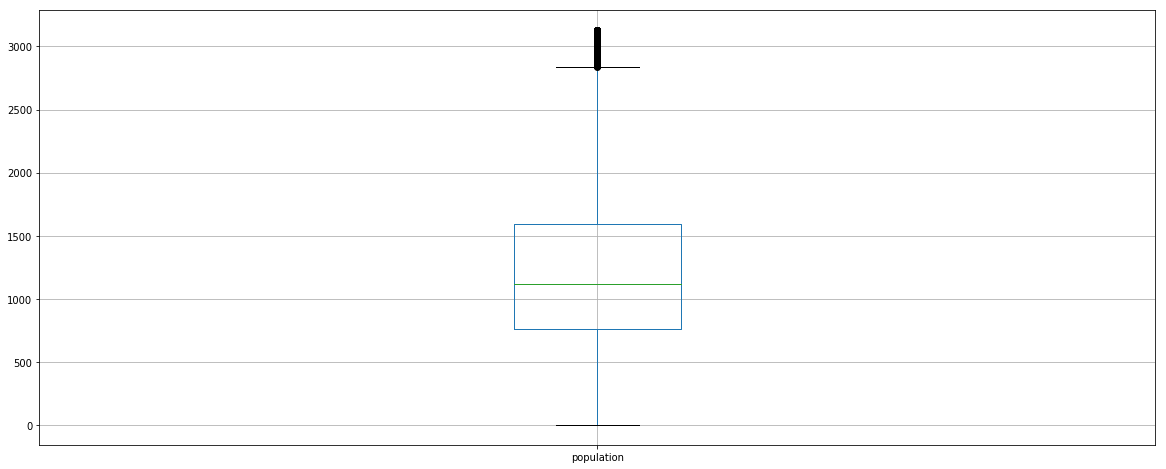

In [30]:
plt.subplots(figsize=[20,8])
df_no_outliers.boxplot('population')

In [31]:
#_, _ = filtrar_outlier_tukey(df_no_outliers.drop(outlier_indices, axis=0).population)

Ahora, prueba a ejectuar el mismo método de tukey pero relajando la zona de outlier a $Q_3 + 3 \times IQR$.

In [34]:
outlier_indices_3, outlier_values_3 = filtrar_outlier_tukey(df.population,valueq1=3.0,valueq3=3.0)

[q1=787.000000, q3=1725.000000, iqr=938.000000]
[floor=-2027.000000, ceiling=4539.000000]
Numero total de outliers:  421


In [35]:
# Eliminamos los outliers asignandoles Not a Number (nan)
df_no_outliers_3 = df.copy()
for index in outlier_indices_3:
    df_no_outliers_3.population.at[index] = np.nan

Y pinta el mismo gráfico de antes para tu variable sin outliers 

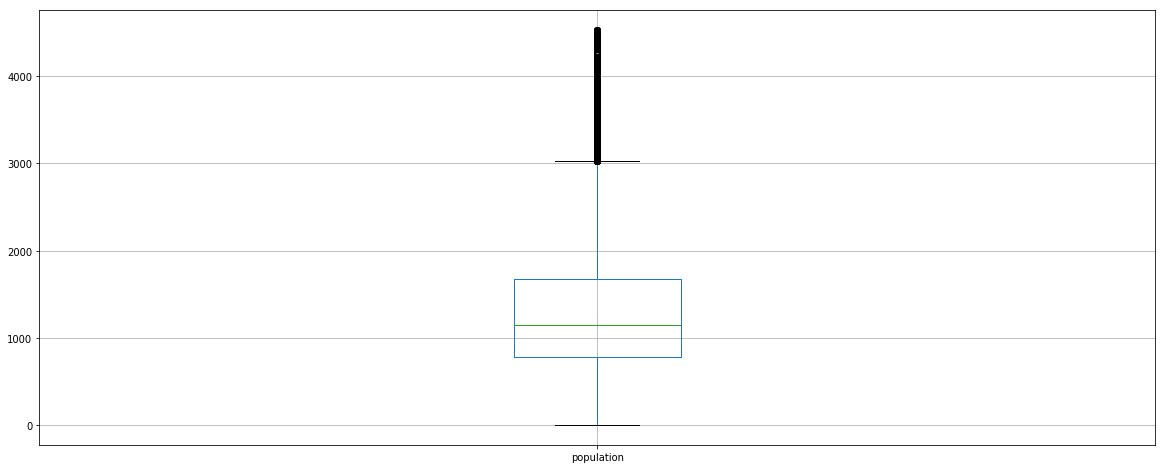

In [36]:
plt.subplots(figsize=[20,8])
df_no_outliers_3.boxplot('population')

In [ ]:
_, _ = filtrar_outlier_tukey(df_no_outliers_3.drop(outlier_indices_3, axis=0).population,valueq3=3.0)

¿Qué diferencias observas en los resultados para los dos umbrales de tukey? ¿A qué crees que se debe?

Al relajar la zona de outlier a Q3 + 3*iqr , se reducen el numero de outliers iniciales porque se extiende el rango superior (variable ceiling)
Segun he leido en alguna documentacion, se habla de dos tipos de outliers (leves y extremos). Los extremos son los que caen fuera del intervalo Q1 − 3IQR,Q3 + 3IQR
y leve si cae fuera del intervalo Q1 − 1, 5IQR, Q3 + 1, 5IQR.

Prueba un nuevo método de detección de outliers que encuentres por Internet y compáralo con los anteriores.

In [ ]:
#The Z-score, or standard score, 
#is a way of describing a data point in terms of its relationship to the mean and standard deviation of a group of points. 
#Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1.

outliers=[]
outliers_indices=[]
def detect_outlier_zscore(data):
    
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
     
    for x,y in data.iteritems():
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers_indices.append(x)
            outliers.append(y)
    return outliers_indices,outliers

In [ ]:
outliers_indices_datapoint,outlier_datapoints = detect_outlier_zscore(df.population)

In [ ]:
# Eliminamos los outliers asignandoles Not a Number (nan)
df_no_outliers_zscore = df.copy()
for index in outliers_indices_datapoint:
    df_no_outliers_zscore.population.at[index] = np.nan

In [ ]:
_, _ = detect_outlier_zscore(df_no_outliers_zscore.drop(outliers_indices_datapoint, axis=0).population)
plt.subplots(figsize=[20,8])
df_no_outliers_zscore.boxplot('population')

El efecto parece bastante similar al de relajar la zona de outlier a Q3 + 3*iqr. No me parece muy robusto puesto que confia en la media y la desviacion 
estandar para calcular la tendencia central y la dispersion, y estas se ven bastante afectadas por los valores atipicos.